In [59]:
dataAugment = True
loadTrainedModel = False

In [60]:
import numpy as np
np.random.seed(10)
import os
import glob
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
#from keras.layers.advanced_activations import LeakyReLU
from keras.layers.advanced_activations import PReLU
import cv2
from matplotlib import pyplot as plt
# Plot inline
%matplotlib inline

if(dataAugment): from keras.preprocessing.image import ImageDataGenerator

In [61]:
nameDataset = "misBlock-224"
imgSize = (224, 224)
dict_labels = {"1-0-1-1": 0,"0-0-1-1": 1, "0-1-0-1": 2, "0-1-1-1": 3, "1-0-0-1": 4, "dark": 5,
              "1-1-0-0": 6, "1-0-0-0": 7, "1-0-1-0": 8, "0-0-1-0": 9, "1-1-1-1": 10, 
              "0-0-0-0": 11, "0-0-0-1": 12, "1-1-1-0": 13, "0-1-0-0": 14, "1-1-0-1": 15, "0-1-1-0": 16 }

images = []
labels = []
labels_hot = []

In [62]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    legendLoc = 'lower right' if(train=='acc') else 'upper right'
    plt.legend(['train', 'validation'], loc=legendLoc)
    plt.show()
    
def load_image(folder):
    
    global images, labels, labels_hot, dict_labels
    
    for filename in os.listdir(folder):
        label = os.path.basename(folders)
        className = np.asarray( label )        
        if label is not None:
            labels.append(className)
            labels_hot.append(dict_labels[label])
            #np.append(labels, className , axis=0)
            #np.append(labels_hot, np.array(dict_labels[label]), axis=0)
            
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(np.array(img))

In [63]:
for folders in glob.glob(nameDataset+"/*"):
    print("Load {} ...".format(folders))
    load_image(folders)

Load misBlock-224/1-0-1-1 ...
Load misBlock-224/0-0-1-1 ...
Load misBlock-224/0-1-0-1 ...
Load misBlock-224/0-1-1-1 ...
Load misBlock-224/1-0-0-1 ...
Load misBlock-224/dark ...
Load misBlock-224/1-1-0-0 ...
Load misBlock-224/1-0-0-0 ...
Load misBlock-224/1-0-1-0 ...
Load misBlock-224/0-0-1-0 ...
Load misBlock-224/1-1-1-1 ...
Load misBlock-224/0-0-0-0 ...
Load misBlock-224/0-0-0-1 ...
Load misBlock-224/1-1-1-0 ...
Load misBlock-224/0-1-0-0 ...
Load misBlock-224/1-1-0-1 ...
Load misBlock-224/0-1-1-0 ...


In [66]:
images = np.array(images) 
labels_hot = np.array(labels_hot)
print("images.shape={} , labels_hot.shape=={}".format(images.shape, labels_hot.shape))
print(labels_hot)

images.shape=(1190, 224, 224, 3) , labels_hot.shape==(1190,)
[ 0  0  0 ..., 16 16 16]


Label:0-0-1-1 , ID:1, shape:(224, 224, 3)


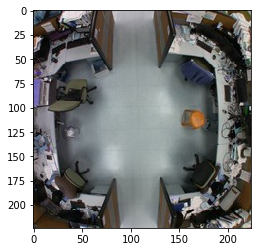

In [67]:
sampleID = 126
plt.imshow(images[sampleID])
print("Label:{} , ID:{}, shape:{}".format(labels[sampleID], labels_hot[sampleID], images[sampleID].shape))

In [68]:
(trainData, testData, trainLabels, testLabels) = train_test_split(images, labels_hot, test_size=0.15, random_state=42)
(trainData, valiData, trainLabels, valiLabels) = train_test_split(trainData, trainLabels, test_size=0.2, random_state=42)

In [69]:
print("trainData records: {}".format(len(trainData)))
print("testData records: {}".format(len(testData)))
print("valiData records: {}".format(len(valiData)))
print("trainData.shape={} trainLabels.shape={}".format(trainData.shape, trainLabels.shape))
print("testData.shape={} testLabels.shape={}".format(testData.shape, testLabels.shape))
print("valiData.shape={} valiLabels.shape={}".format(valiData.shape, valiLabels.shape))

trainData records: 808
testData records: 179
valiData records: 203
trainData.shape=(808, 224, 224, 3) trainLabels.shape=(808,)
testData.shape=(179, 224, 224, 3) testLabels.shape=(179,)
valiData.shape=(203, 224, 224, 3) valiLabels.shape=(203,)


In [70]:
trainLabels_hot = np_utils.to_categorical(trainLabels)
testLabels_hot = np_utils.to_categorical(testLabels)
valiLabels_hot = np_utils.to_categorical(valiLabels)
print(trainLabels_hot.shape)
print(testLabels_hot.shape)
print(valiLabels_hot.shape)

(808, 17)
(179, 17)
(203, 17)


In [71]:
trainData_normalize = trainData.astype('float32') / 255.0
testData_normalize = testData.astype('float32') / 255.0
valiData_normalize = valiData.astype('float32') / 255.0

In [72]:
from skimage import exposure

def AHE(img):
    img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
    return img_adapteq

if(dataAugment):
    train_datagen = ImageDataGenerator(
        preprocessing_function=AHE,
        fill_mode='nearest')
    
    train_datagen.fit(trainData_normalize)

In [73]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D

In [74]:
model = Sequential()

In [75]:
model.add(Conv2D(filters=32, kernel_size=(7, 7), padding='same', input_shape=(imgSize[0], imgSize[1], 3)))
#model.add(LeakyReLU(alpha=.001))   # add an advanced activation
model.add(PReLU())
model.add(Dropout(rate=0.25))

In [76]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [77]:
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same'))
#model.add(LeakyReLU(alpha=.001))   # add an advanced activation
model.add(PReLU())
model.add(Dropout(rate=0.25))

In [78]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [79]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [80]:
model.add(Dense(1024))
#model.add(LeakyReLU(alpha=.001))   # add an advanced activation
model.add(PReLU())
model.add(Dropout(rate=0.25))

In [81]:
model.add(Dense(len(dict_labels), activation='softmax'))

In [82]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 224, 224, 32)      4736      
_________________________________________________________________
p_re_lu_7 (PReLU)            (None, 224, 224, 32)      1605632   
_________________________________________________________________
dropout_9 (Dropout)          (None, 224, 224, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 112, 112, 64)      51264     
_________________________________________________________________
p_re_lu_8 (PReLU)            (None, 112, 112, 64)      802816    
_________________________________________________________________
dropout_10 (Dropout)         (None, 112, 112, 64)      0         
__________

In [83]:
from keras import optimizers
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [84]:
epochs = 50
batch_size = 64
steps_per_epoch=int((len(trainData)*2)/batch_size)
print("steps_per_epoch={}".format(trainData_normalize.shape))
print("trainLabels_hot.shape={}".format(trainLabels_hot.shape))
print("steps_per_epoch={}".format(steps_per_epoch))

if(dataAugment):
#    train_history = model.fit_generator(train_datagen.flow(trainData_normalize, trainLabels_hot, batch_size=batch_size),
#                        steps_per_epoch=round(len(trainData)/batch_size),
#                        epochs=epochs,
#                        validation_data=(valiData_normalize, valiLabels_hot))
#     train_history = model.fit_generator(train_datagen.flow(trainData_normalize, trainLabels_hot, batch_size=batch_size),
#                        samples_per_epoch=(len(trainData)*2),
#                        nb_epoch=epochs,
#                        validation_data=(valiData_normalize, valiLabels_hot))

     train_history = model.fit_generator(train_datagen.flow(trainData_normalize, trainLabels_hot, batch_size=batch_size),
                        steps_per_epoch=steps_per_epoch, epochs=epochs,
                        validation_data=(valiData_normalize, valiLabels_hot))
else:
    train_history = model.fit(x=trainData_normalize, y=trainLabels_hot, validation_split=0.15, epochs=epochs, batch_size=batch_size, verbose=1)

steps_per_epoch=(808, 224, 224, 3)
trainLabels_hot.shape=(808, 17)
steps_per_epoch=25
Epoch 1/50


/home/chtseng/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


25/25 [==============================] - 359s - loss: 2.8731 - acc: 0.0758 - val_loss: 2.7930 - val_acc: 0.1576
Epoch 2/50
25/25 [==============================] - 307s - loss: 2.7088 - acc: 0.1300 - val_loss: 2.7108 - val_acc: 0.2414
Epoch 3/50
25/25 [==============================] - 307s - loss: 2.5071 - acc: 0.2578 - val_loss: 2.5035 - val_acc: 0.4384
Epoch 4/50
25/25 [==============================] - 306s - loss: 2.0805 - acc: 0.4023 - val_loss: 2.0840 - val_acc: 0.5616
Epoch 5/50
25/25 [==============================] - 306s - loss: 1.5440 - acc: 0.5148 - val_loss: 1.7151 - val_acc: 0.6749
Epoch 6/50
25/25 [==============================] - 306s - loss: 1.0159 - acc: 0.6587 - val_loss: 1.6872 - val_acc: 0.7389
Epoch 7/50
25/25 [==============================] - 306s - loss: 0.6208 - acc: 0.8052 - val_loss: 0.9447 - val_acc: 0.8276
Epoch 8/50
25/25 [==============================] - 306s - loss: 0.4555 - acc: 0.8624 - val_loss: 0.8775 - val_acc: 0.8571
Epoch 9/50
25/25 [=========

In [85]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    legendLoc = 'lower right' if(train=='acc') else 'upper right'
    plt.legend(['train', 'validation'], loc=legendLoc)
    plt.show()

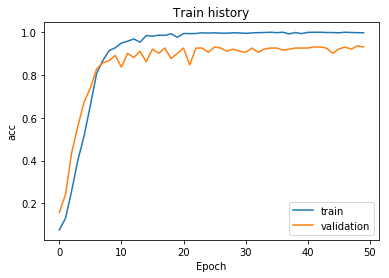

In [86]:
show_train_history(train_history, 'acc', 'val_acc')

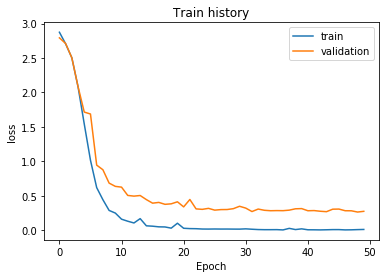

In [87]:
show_train_history(train_history, 'loss', 'val_loss')

In [88]:
import pandas as pd
prediction = model.predict_classes(testData_normalize)
pd.crosstab(testLabels, prediction, rownames=['label'], colnames=['predict'])

179/179 [==============================] - 10s    


predict,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
label,,,,,,,,,,,,,,,,,
0,8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,12,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,7,0,0,2,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,8,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,11,2,0,0,0,0,0,0,0


In [89]:
from sklearn.metrics import classification_report
print(classification_report(testLabels, prediction))

             precision    recall  f1-score   support

          0       1.00      0.89      0.94         9
          1       0.91      1.00      0.95        10
          2       1.00      0.92      0.96        13
          3       1.00      1.00      1.00        14
          4       0.88      0.64      0.74        11
          5       1.00      1.00      1.00        14
          6       0.91      1.00      0.95        10
          7       0.80      0.89      0.84         9
          8       1.00      0.85      0.92        13
          9       0.67      0.80      0.73         5
         10       1.00      0.93      0.96        14
         11       0.69      1.00      0.82         9
         12       0.80      0.89      0.84         9
         13       0.89      1.00      0.94         8
         14       0.91      0.83      0.87        12
         15       1.00      1.00      1.00         8
         16       1.00      0.91      0.95        11

avg / total       0.93      0.92      0.92  

In [90]:
imagesGave = []
labelsGave = []
labelidGave = []

def load_image_predict(folder):    
    global images, labels, labels_hot, dict_labels
    
    for filename in os.listdir(folder):
        label = os.path.basename(folders)      
        if label is not None:
            labelidGave.append(dict_labels[label])
            labelsGave.append(label)
            
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            imagesGave.append(np.array(img))     

In [91]:
for folders in glob.glob("20170929/*"):
    print("Load {} ...".format(folders))
    load_image_predict(folders)

normalizeGave = np.array(imagesGave).astype('float32') / 255.0

Load 20170929/1-0-1-1 ...
Load 20170929/0-1-1-1 ...
Load 20170929/1-0-0-1 ...
Load 20170929/1-1-0-0 ...
Load 20170929/1-0-1-0 ...
Load 20170929/1-1-1-1 ...
Load 20170929/0-0-0-0 ...
Load 20170929/1-1-1-0 ...
Load 20170929/0-1-0-0 ...
Load 20170929/1-1-0-1 ...
Load 20170929/0-1-1-0 ...


In [92]:
LabelsGave_hot = np_utils.to_categorical(labelidGave)
scores = model.evaluate(normalizeGave, LabelsGave_hot)
print("Score for the prediction: {}".format(scores[1]) )

predictionGave = model.predict_classes(normalizeGave) 
pd.crosstab(np.array(labelidGave), predictionGave, rownames=['label'], colnames=['predict'])

165/165 [==============================] - 9s     
Score for the prediction: 0.8363636363636363
165/165 [==============================] - 9s     


predict,0,3,4,6,8,9,10,11,13,14,15,16
label,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,6,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0
6,0,0,0,4,0,0,0,0,0,0,0,0
8,0,0,0,0,16,1,0,0,0,0,0,0
10,2,6,0,0,0,0,57,0,4,0,13,0
11,0,0,0,0,0,0,0,2,0,0,0,0
13,0,0,0,1,0,0,0,0,35,0,0,0
14,0,0,0,0,0,0,0,0,0,1,0,0


In [93]:
ii = 1

for sampleID in range(0,len(imagesGave)): 
    
    if(labelidGave[sampleID] != predictionGave[sampleID]):
        keys = [ key for key,value in dict_labels.items() if value==predictionGave[sampleID] ]
    
        title = ("{}. [{}]: {} =>{}".format(ii, sampleID, labelsGave[sampleID], keys[0]))
        print(title)
        
        ii += 1

1. [20]: 1-0-1-0 =>0-0-1-0
2. [36]: 1-1-1-1 =>1-0-1-1
3. [37]: 1-1-1-1 =>0-1-1-1
4. [40]: 1-1-1-1 =>1-1-0-1
5. [43]: 1-1-1-1 =>1-1-0-1
6. [46]: 1-1-1-1 =>1-1-0-1
7. [47]: 1-1-1-1 =>1-0-1-1
8. [52]: 1-1-1-1 =>1-1-0-1
9. [57]: 1-1-1-1 =>1-1-0-1
10. [58]: 1-1-1-1 =>1-1-0-1
11. [60]: 1-1-1-1 =>1-1-0-1
12. [63]: 1-1-1-1 =>1-1-0-1
13. [64]: 1-1-1-1 =>1-1-1-0
14. [69]: 1-1-1-1 =>0-1-1-1
15. [73]: 1-1-1-1 =>1-1-1-0
16. [76]: 1-1-1-1 =>1-1-0-1
17. [78]: 1-1-1-1 =>1-1-0-1
18. [82]: 1-1-1-1 =>0-1-1-1
19. [85]: 1-1-1-1 =>0-1-1-1
20. [87]: 1-1-1-1 =>1-1-0-1
21. [102]: 1-1-1-1 =>0-1-1-1
22. [104]: 1-1-1-1 =>1-1-0-1
23. [105]: 1-1-1-1 =>1-1-1-0
24. [107]: 1-1-1-1 =>0-1-1-1
25. [108]: 1-1-1-1 =>1-1-1-0
26. [110]: 1-1-1-1 =>1-1-0-1
27. [138]: 1-1-1-0 =>1-1-0-0


[22]: 1-0-1-0 =>1-1-0-0


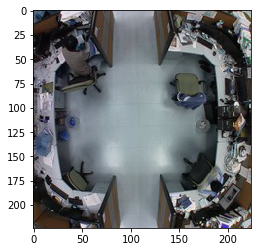

In [94]:
sampleID = 22
plt.imshow(imagesGave[sampleID])
print("[{}]: {} =>{}".format(sampleID, labelsGave[sampleID], keys[0]))

In [98]:
# serialize model to JSON
model_json = model.to_json()
with open("misOffice-model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("misOffice-json-model.h5")
print("Saved model to disk")

Saved model to disk


In [99]:
# serialize model to YAML
model_yaml = model.to_yaml()
with open("misOffice-model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("misOffice-yaml-model.h5")
print("Saved model to disk")

Saved model to disk


In [101]:
from keras.models import model_from_json

# load json and create model
json_file = open('misOffice-model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("misOffice-json-model.h5")
print("Loaded model from disk")

loaded_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
scores = loaded_model.evaluate(normalizeGave, LabelsGave_hot)
print("Score for the prediction: {}".format(scores[1]) )

Loaded model from disk
165/165 [==============================] - 9s     
Score for the prediction: 0.8363636363636363


In [102]:
from keras.models import model_from_yaml

# load YAML and create model
yaml_file = open('misOffice-model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("misOffice-yaml-model.h5")
print("Loaded model from disk")

loaded_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
scores = loaded_model.evaluate(normalizeGave, LabelsGave_hot)
print("Score for the prediction: {}".format(scores[1]) )

Loaded model from disk
165/165 [==============================] - 9s     
Score for the prediction: 0.8363636363636363
